In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define my teacher model
my_teacher_model = tm.TeacherModel(verbose=False)
my_teacher_model.config(select_model="quad", x_lower_limit=-0.99, x_upper_limit=0.99, number_of_points=20, a=1.0, b=0, c=0)
#my_teacher_model.plot_model()

Note: Training Data is initialized


In [3]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding(verbose=False)
my_quantum_encoding.config(select_encoding="rzacos_ryasin")

# Entangling block
my_entangling = qc.HamlitonianMixerBlock(verbose=False)

# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock(verbose=False)

# Quantum Measurement
my_measurement = qc.QuantumMeasurement(verbose=False)
my_measurement.config(select_measurement = "first_qubit_Z")

# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer(verbose=False)
my_quantum_computer.config(number_of_qubits=6, depth=6) 
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [4]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer(verbose=False)
my_trainer.config(select_optimiser = "GD", select_loss="sobolev_loss", max_training_steps=10, learning_rate=0.01)
my_trainer.inputs(my_teacher_model, my_quantum_computer)

In [5]:
my_trainer.train()

47.86056934728683
12.898704937954278
11.844582014834403
8.617958344276973
7.969382921128714
7.459664780606785
7.212131968626131
7.039217178737996
6.8609997720252185
6.670385780110051
6.670385780110051
a = 0.30964653749481913


Text(0.5, 0.98, 'Quantum Circuit Learning\n Quadratic Model')

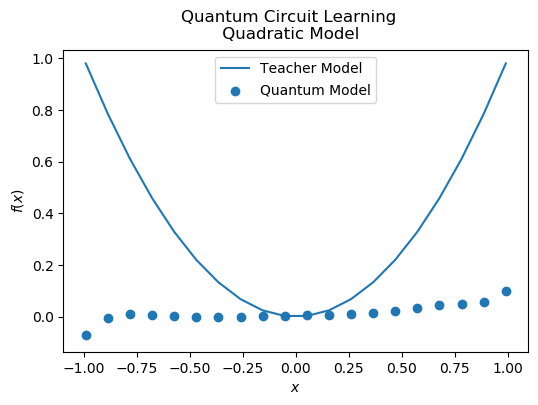

In [7]:
predict_y = []
for data_iter in range(20):
    predict_result = my_quantum_computer.run_qc(my_teacher_model.training_data["x_data"][data_iter])
    predict_y.append(predict_result["output_data"])
    
fig1, ax1 = plt.subplots(dpi=100)
ax1.scatter(my_teacher_model.training_data["x_data"], 0.30964653749481913 * np.asarray(predict_y),label="Quantum Model")
y = np.square(my_teacher_model.training_data["x_data"]) 
ax1.plot(my_teacher_model.training_data["x_data"],y,label="Teacher Model")
ax1.set_ylabel(r"$f(x)$")
ax1.set_xlabel(r"$x$")
ax1.legend()
fig1.suptitle("Quantum Circuit Learning\n Quadratic Model")

In [9]:
np.square(y - 0.30964653749481913 * np.asarray(predict_y))

array([1.10819861e+00, 6.22268379e-01, 3.61950303e-01, 2.04433631e-01,
       1.06460580e-01, 4.85936499e-02, 1.79938568e-02, 4.60196243e-03,
       4.99815468e-04, 2.02800250e-06, 8.87547331e-06, 3.05731064e-04,
       3.46701629e-03, 1.42898450e-02, 3.92641708e-02, 8.71769420e-02,
       1.71694291e-01, 3.13823545e-01, 5.32023258e-01, 7.77242075e-01])